c:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0836 - val_loss: 0.0068
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - val_loss: 7.3904e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.7349e-04 - val_loss: 7.1656e-04
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2837e-04 - val_loss: 7.5931e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2390e-04 - val_loss: 7.3117e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4738e-04 - val_loss: 7.9682e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1422e-04 - val_loss: 7.4038e-04
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 5.0981e-04 - val_loss: 6.7032e-04
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.5974e-04 - val_loss: 8.3839e-04
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1358e-04 - val_loss: 6.3469e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 

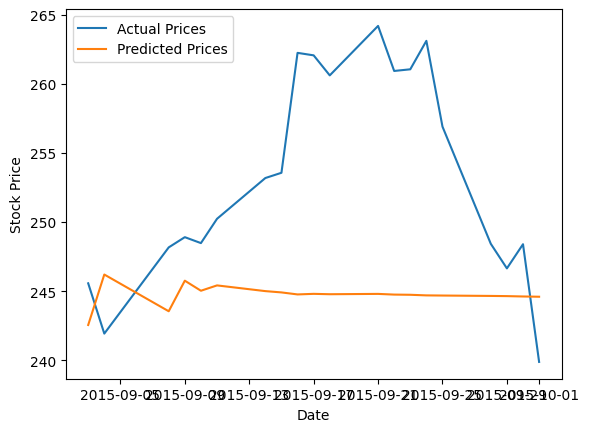

Day 1: Actual: 245.570007, Predicted: 242.55323791503906
Day 2: Actual: 241.929993, Predicted: 246.205810546875
Day 3: Actual: 248.169998, Predicted: 243.5470428466797
Day 4: Actual: 248.910004, Predicted: 245.7600555419922
Day 5: Actual: 248.479996, Predicted: 245.0319061279297
Day 6: Actual: 250.240005, Predicted: 245.41848754882812
Day 7: Actual: 253.190002, Predicted: 245.0049591064453
Day 8: Actual: 253.570007, Predicted: 244.9110107421875
Day 9: Actual: 262.25, Predicted: 244.76522827148438
Day 10: Actual: 262.070007, Predicted: 244.80714416503906
Day 11: Actual: 260.619995, Predicted: 244.7801055908203
Day 12: Actual: 264.200012, Predicted: 244.80377197265625
Day 13: Actual: 260.940002, Predicted: 244.7534942626953
Day 14: Actual: 261.059998, Predicted: 244.73973083496094
Day 15: Actual: 263.119995, Predicted: 244.6960906982422
Day 16: Actual: 256.910004, Predicted: 244.68511962890625
Day 17: Actual: 248.429993, Predicted: 244.6565704345703
Day 18: Actual: 246.649994, Predicted:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('Tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2. Preprocess the data (normalize)
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")


In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN
# from sklearn.model_selection import train_test_split

# # 1. Load the dataset
# df = pd.read_csv('/content/tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # 2. Preprocess the data (normalize)
# data = df[['Close']].values
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data)

# # 3. Create sequences for the RNN
# def create_sequences(data, sequence_length):
#     X, y = [], []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i + sequence_length])
#         y.append(data[i + sequence_length])
#     return np.array(X), np.array(y)

# sequence_length = 120
# X, y = create_sequences(scaled_data, sequence_length)

# # 4. Split the data into train and test sets
# split_index = int(len(X) * 0.8)
# X_train, y_train = X[:split_index], y[:split_index]
# X_test, y_test = X[split_index:], y[split_index:]

# # 5. Build the RNN model
# model = Sequential()
# model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
# model.add(Dense(1))  # Output layer for predicting the stock price

# model.compile(optimizer='adam', loss='mean_squared_error')

# # 6. Train the model on the training set
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # 7. Predict for the next 20 days
# # Use the last 60 days from the training set to predict the next 20 days
# predictions = []
# input_sequence = scaled_data[split_index - sequence_length:split_index]

# for _ in range(20):  # Predict for the next 20 days
#     input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
#     predicted_price = model.predict(input_sequence)

#     predictions.append(predicted_price[0][0])  # Save predicted price

#     # Reshape the predicted price to match input shape (1, 1, 1)
#     predicted_price = np.reshape(predicted_price, (1, 1, 1))

#     # Shift the input_sequence and append the predicted price
#     input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

# # 8. Inverse transform the predicted prices
# predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# # 9. Compare with the actual prices
# actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

# # 10. Plot the results
# plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
# plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# # Print actual and predicted prices for the next 20 days
# for i in range(20):
#     print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")
